In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
!cd ../MonteCarlo/bin/ && ./caminante_1d

n_max: 20, rep: 1000, prob_mean: 0.567000, error: 0.010023
n_max: 40, rep: 1000, prob_mean: 0.670100, error: 0.009818
n_max: 80, rep: 1000, prob_mean: 0.770000, error: 0.009055
n_max: 160, rep: 1000, prob_mean: 0.826900, error: 0.008340
n_max: 320, rep: 1000, prob_mean: 0.872500, error: 0.007520
n_max: 640, rep: 1000, prob_mean: 0.906100, error: 0.006545
n_max: 1280, rep: 1000, prob_mean: 0.935200, error: 0.005542
n_max: 2560, rep: 1000, prob_mean: 0.955900, error: 0.004599
n_max: 5120, rep: 1000, prob_mean: 0.973000, error: 0.003570
n_max: 10240, rep: 1000, prob_mean: 0.975200, error: 0.003558


   n_max  caminantes    prob     error
0     20        1000  0.5670  0.010023
1     40        1000  0.6701  0.009818
2     80        1000  0.7700  0.009055
3    160        1000  0.8269  0.008340
4    320        1000  0.8725  0.007520
5    640        1000  0.9061  0.006545
6   1280        1000  0.9352  0.005542
7   2560        1000  0.9559  0.004599
8   5120        1000  0.9730  0.003570
9  10240        1000  0.9752  0.003558


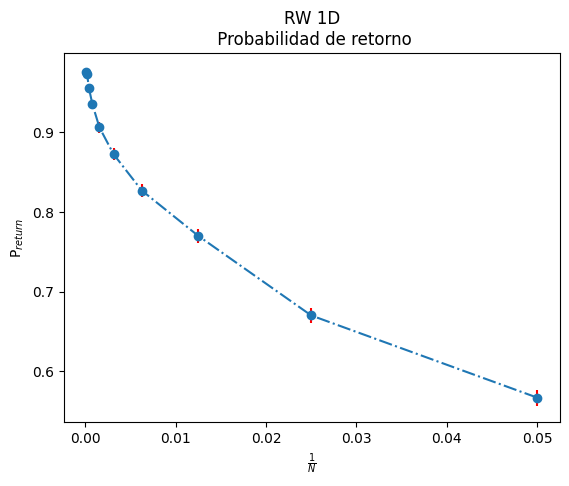

In [17]:
archivo="caminante_1d.csv"
ruta = f'Datos/{archivo}'
titulo_dim="RW 1D\n Probabilidad de retorno"
df = pd.read_csv(ruta,sep=",")
print(df)

'''
plt.scatter(df['n_max'],df['prob'])
plt.title(titulo_dim)
plt.xlabel('Repeticiones')
plt.ylabel('Probabilidad')
plt.show()
'''

plt.errorbar(1/df['n_max'],df['prob'],yerr=df["error"],marker="o",ls="-.",ecolor="red")
plt.title(titulo_dim)
plt.xlabel('$\\frac{1}{N}$')
#plt.xscale("log")
plt.ylabel('P$_{return}$')
plt.show()

### Comparación para comprobación de funciones matematicas escritas en Python y en C 

In [17]:
sum=0
for i in df[0]:
    sum+=i
prom=sum/len(df[0])

sum_x2=0
for i in df[0]:
    sum_x2+=i**2
var = (sum_x2-len(df[0])*(prom**2))/(len(df[0])-1)

err= np.sqrt(var/len(df[0]))

print(f"mean: {prom}")
print(f"var: {var}")
print(f"err: {err}")

mean: 10.196482110588938
var: 11.08106196819768
err: 0.332882291030894


In [19]:
!cd ../MonteCarlo/bin/ && ./math_stats_test

mean: 10.196482
 var: 11.081062
 err: 0.332882
